In [34]:
import networkx as nx

G = nx.erdos_renyi_graph(25, 0.5)


Number of conflicts: 0
Number of iterations: 900011
conflicts over time [49, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 26, 27, 28, 28, 23, 28, 26, 24, 26, 27, 25, 24, 26, 28, 25, 24, 26, 28, 15, 16, 11, 12, 17, 14, 19, 16, 16, 13, 19, 19, 15, 15, 17, 17, 15, 17, 7, 9, 8, 8, 10, 8, 7, 7, 8, 7, 10, 11, 7, 7, 9, 8, 7, 7, 2, 4, 2, 2, 4, 6, 1, 1, 4, 1, 3, 1, 5, 5, 4, 4, 2, 2]
7 colors used: ['red', 'blue', (0.4471520810248133, 0.6892972642554547, 0.201417567096413), (0.3531769117965181, 0.8849622749678333, 0.755471060824951), (0.3162369421311929, 0.07805393926865922, 0.5939113104553853), (0.07204638553145504, 0.9226850540984166, 0.7337200386428118), (0.9662288968185387, 0.4769970669231526, 0.7038999801381322)]


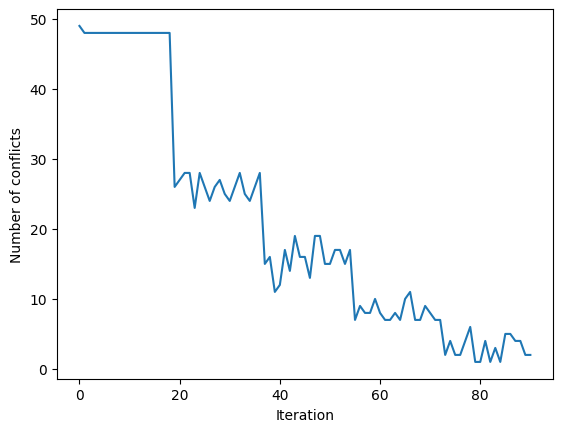

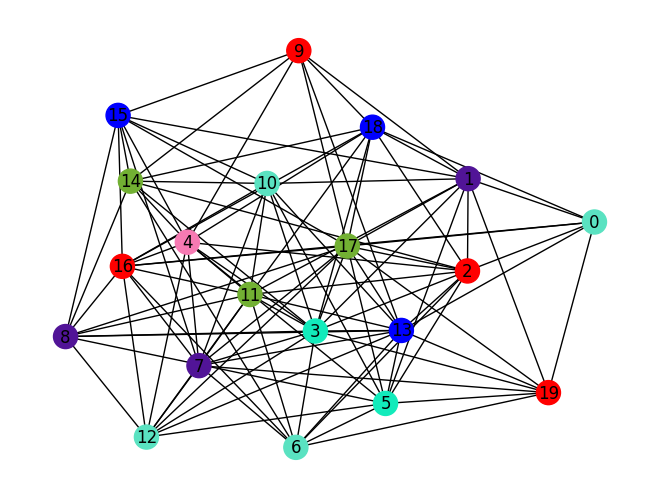

In [36]:
import random
import time
import matplotlib.pyplot as plt


colour_add_interval = 180000
conflict_check_interval = 10000
colors = [] 


colors = ['red', 'blue'] 
for node in G.nodes:
    G.nodes[node]['color'] = random.choice(colors)

def count_conflicts(G):
    conflicts = 0
    for u, v in G.edges:
        if G.nodes[u]['color'] == G.nodes[v]['color']:
            conflicts += 1
    return conflicts

def add_color(colors):
    new_color = (random.random(), random.random(), random.random())  
    colors.append(new_color)
    return colors

def resolve_conflicts(G):
    for u, v in G.edges:
        if G.nodes[u]['color'] == G.nodes[v]['color']:
            G.nodes[u]['color'] = random.choice([c for c in colors if c != G.nodes[u]['color']])

start_time = time.time()
conflicts_over_time = []
i = 0
while count_conflicts(G) > 0:
    if i != 0 and i % colour_add_interval == 0:
        colors = add_color(colors)
    if i % 10000 == 0: 
        conflicts_over_time.append(count_conflicts(G))
    resolve_conflicts(G)
    i += 1
print('Number of conflicts:', count_conflicts(G))
print('Number of iterations:', i)
print('conflicts over time', conflicts_over_time)
print(f'{len(colors)} colors used: {colors}')

plt.plot(conflicts_over_time)
plt.xlabel('Iteration')
plt.ylabel('Number of conflicts')
plt.show()

color_map = [G.nodes[node]['color'] for node in G.nodes]
nx.draw(G, node_color=color_map, with_labels=True)
plt.show()

In [37]:

G = nx.erdos_renyi_graph(10, 0.5)


colors = ['red', 'blue', 'green', 'yellow']

def run_experiment(G):
    start_time = time.time()
    conflicts_over_time = []
    i = 0
    while count_conflicts(G) > 0 and time.time() - start_time < 60:
        if i % 10000 == 0:
            conflicts_over_time.append(count_conflicts(G))
        resolve_conflicts(G)
        i += 1
    print('Number of conflicts:', count_conflicts(G))
    print('Number of iterations:', i)

for node in G.nodes:
    G.nodes[node]['color'] = colors[0]
    G.nodes[node]['available_colors'] = colors.copy()
print('Scenario 1: All nodes start with the same color')
run_experiment(G)

for node in G.nodes:
    G.nodes[node]['color'] = random.choice(colors) 
    G.nodes[node]['available_colors'] = colors.copy() 
print('Scenario 2: Nodes are assigned a random color')
run_experiment(G)

for i, node in enumerate(G.nodes):
    G.nodes[node]['color'] = colors[i % len(colors)] 
    G.nodes[node]['available_colors'] = colors.copy()
print('Scenario 3: Nodes are assigned colors sequentially')
run_experiment(G)

Scenario 1: All nodes start with the same color


KeyboardInterrupt: 